In [2]:
# Importing pandas for data wrangling and matplotlib for graphing
import pandas as pd
import matplotlib.pyplot as plt
# Reading dataset into python
orig_data = pd.read_csv('/Users/jackbonacci/Downloads/train.csv')

In [3]:
# Cleaning dataset exactly how I did for previous project assignment
trimmed_data = orig_data.drop(columns=['id', 'first_review', 'last_review', 'neighbourhood', 'thumbnail_url', 'number_of_reviews'])
complete = trimmed_data.dropna()

In [4]:
# Viewing descriptive statistics
complete.describe(include='all')
# Have a low outlier in log_price (0) that I need to get rid of. 

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_response_rate,host_since,instant_bookable,latitude,longitude,name,review_scores_rating,zipcode,bedrooms,beds
count,47249.000000,47249,47249,47249,47249.000000,47249.000000,47249,47249,47249,47249,...,47249,47249,47249,47249.000000,47249.000000,47249,47249.000000,47249,47249.000000,47249.000000
unique,NaN,32,3,43830,NaN,NaN,5,5,2,6,...,77,3004,2,NaN,NaN,46952,NaN,710,NaN,NaN
top,NaN,Apartment,Entire home/apt,{},NaN,NaN,Real Bed,strict,True,NYC,...,100%,2014-02-14,f,NaN,NaN,Bunk bed in the Treat Street Clubhouse,NaN,90291,NaN,NaN
freq,NaN,29652,27125,122,NaN,NaN,45982,24407,38838,19165,...,37369,153,33373,NaN,NaN,8,NaN,972,NaN,NaN
mean,4.750929,NaN,NaN,NaN,3.324409,1.239878,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,38.364100,-93.218728,NaN,94.216386,NaN,1.281466,1.794683
std,0.675137,NaN,NaN,NaN,2.236491,0.582830,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.149020,21.707139,NaN,7.216313,NaN,0.864653,1.321989
min,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33.338905,-122.511500,NaN,20.000000,NaN,0.000000,0.000000
25%,4.304065,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,34.107355,-118.345112,NaN,92.000000,NaN,1.000000,1.000000
50%,4.700480,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,40.650424,-77.026028,NaN,96.000000,NaN,1.000000,1.000000
75%,5.164786,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,40.750943,-73.954662,NaN,99.000000,NaN,1.000000,2.000000


In [5]:
# Counting how many units are west of the Mississippi River. 
print((complete['longitude']<= -89.978027).sum())

19126


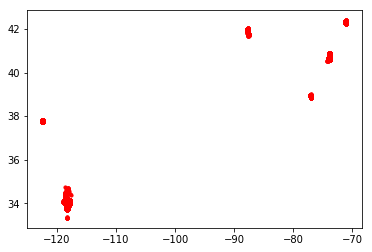

In [6]:
plt.scatter(complete['longitude'], complete['latitude'], 10, marker ='o', color='red')
plt.show()
# Units are in 6 total metropolitan areas- LA, SF, CHI, DC, NYC, BOS.
# Important becuase only having metropolitan rentals is telling of the type of trip someone is going on. Not the best sample. 

In [7]:
# There are 357 units that have more than the average amount of bedrooms and bathrooms but are priced below the average.
print(((complete['log_price']<= 4.750929) & (complete['bedrooms']>1.281466) & (complete['bathrooms']>1.239878)).sum())

357


In [8]:
# (9697/47249) = 20.5% of units are west of the Mississippi and are priced below the average
print(((complete['log_price']<= 4.750929) & (complete['longitude']<= -89.978027)).sum())
# (14993/47249) = 31.7% of units are east of the Mississippi and are price below the average. 
print(((complete['log_price']<= 4.750929) & (complete['longitude']> -89.978027)).sum())

9697
14993


In [13]:
print(9697/19126)
print(14994/(47249-19126))
# number of units below the average price
(9697+14993)/47249
# Slightly skewed to the right

0.5070061696120465
0.5331579134516232


0.5225507418146416

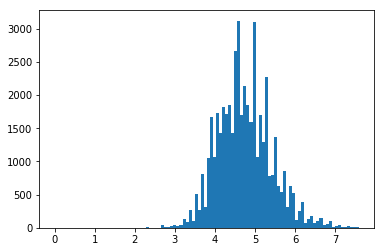

In [10]:
#Checking skew
plt.hist(complete['log_price'], bins=100)
plt.show()

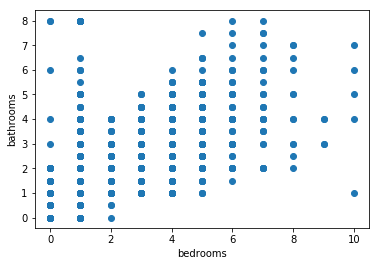

In [11]:
# Some data points don't make any sense (i.e. 0 bedrooms and 8 bathrooms)
plt.scatter(complete['bedrooms'], complete['bathrooms'])
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')
plt.show()

In [86]:
# Trying to convert log_price to norm_price so I can graph review ratings vs. price in a linear fashion. 
pd.to_numeric(complete['log_price'])
from math import exp
for i in complete['log_price']:
    complete['norm_price'] = exp(complete['log_price'])

TypeError: cannot convert the series to <class 'float'>

In [81]:
# More of the same. It is definitely a 'type' problem 
def delog():
    norm_price = exp(complete['log_price'])
    return norm_price

TypeError: cannot convert the series to <class 'float'>

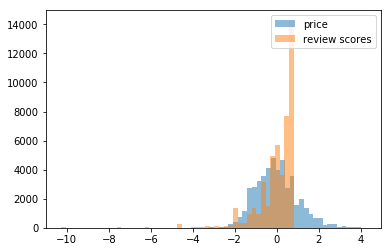

In [16]:
# 
norm_log_price = (complete['log_price']-complete['log_price'].mean())/complete['log_price'].std()
norm_reviews = (complete['review_scores_rating']-complete['review_scores_rating'].mean())/complete['review_scores_rating'].std()
plt.hist(norm_log_price, bins=50, alpha=0.5, label='price')
plt.hist(norm_reviews, bins=50, alpha=0.5, label='review scores')
plt.legend(loc='upper right')
plt.show()